# Doggo Brain Check


In [1]:
#Import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#URL to csvs
breed_info_url="https://raw.githubusercontent.com/OtterBots/DoggieData/main/AKC_Breed_Info.csv"
intel_url = "https://raw.githubusercontent.com/OtterBots/DoggieData/main/dog_intelligence.csv"

In [3]:
#Import data
df1 = pd.read_csv(breed_info_url)
df2 = pd.read_csv(intel_url)

## _Pre-Process data_

- Joing dataframes
- Drop rows that dont have an entry in both tables
- Convert string value to useable numbers
- The lowest inteligence levels dont have an obey value so assume 0

***There is one row Alaskan Malamute which has na for physical dimensions. Currently we fill to 0 but the data seems like it will negatively affect our invesitgation. Need to investigate***

In [16]:
#merge
dd=pd.merge(df1,df2, on='Breed')

#drop old index
dd.drop('index_x', axis=1,inplace=True)
dd.drop('index_y', axis=1,inplace=True)

#fill nan for dummies
dd['obey'].fillna('0%', inplace=True)

#convert obey to int
def obeyToInt(x):
    str(x)
    return int(x.replace('%',''))
dd['obey'] = dd['obey'].apply(obeyToInt)

#convert dimension collumns to float. Replace na with 0
def dimension(x):
    str(x)
    if x == 'na':
        return 0
    else:
        return float(x)

dd['height_low_inches'] = dd['height_low_inches'].apply(dimension)
dd['height_high_inches'] = dd['height_high_inches'].apply(dimension)
dd['weight_low_lbs'] = dd['weight_low_lbs'].apply(dimension)
dd['weight_high_lbs'] = dd['weight_high_lbs'].apply(dimension)

- Average all the number columns 

In [17]:
#add averages
dd['weight_avg'] = (dd['weight_high_lbs']+dd['weight_low_lbs'])/2
dd['height_avg'] = (dd['height_high_inches']+dd['height_low_inches'])/2
dd['reps_avg'] = (dd['reps_lower']+dd['reps_upper'])/2

## _Data Exploration plots_

### .................. DREW .....................

Text(0.5, 1.0, 'smarts vs average_weight')

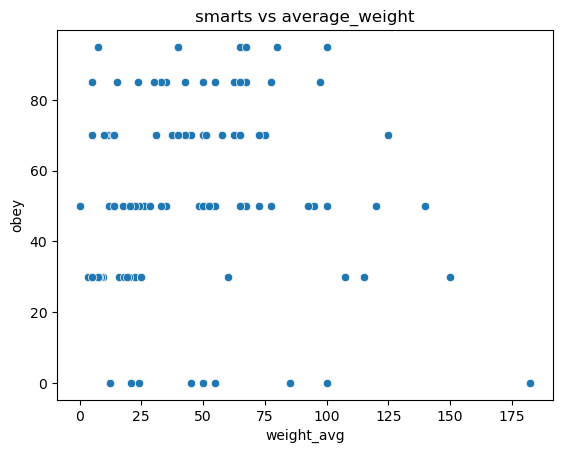

In [22]:
sns.scatterplot(data=dd, y='obey', x='weight_avg')
plt.title('smarts vs average_weight')

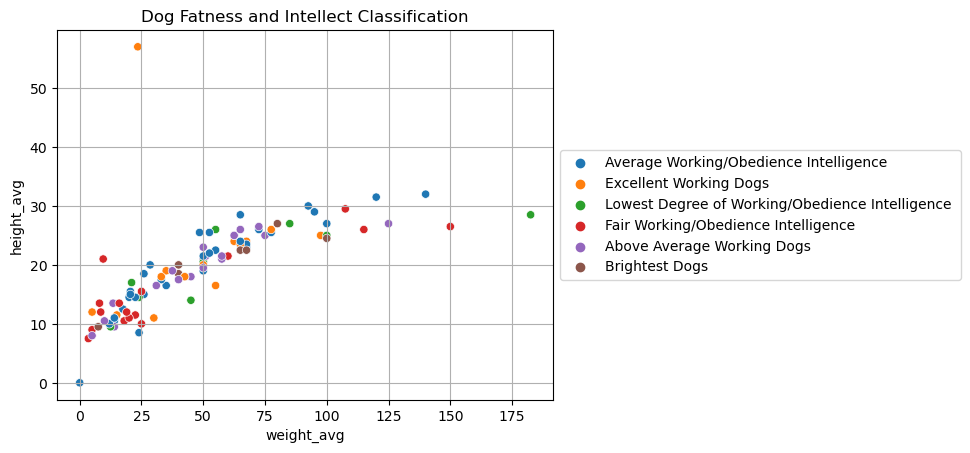

In [72]:
sns.scatterplot(data=dd, x='weight_avg', y='height_avg', hue='Classification')
plt.title('Dog Fatness and Intellect Classification')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

In [76]:
dd[(dd['weight_avg'] > 150) | (dd['height_avg'] > 50)]

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Classification,obey,reps_lower,reps_upper,weight_avg,height_avg,reps_avg
9,Mastiff,27.0,30.0,175.0,190.0,Lowest Degree of Working/Obedience Intelligence,0,81,100,182.5,28.5,90.5
66,Vizsla,48.0,66.0,22.0,25.0,Excellent Working Dogs,85,5,15,23.5,57.0,10.0


Checked outliers. Mastiff weight seems reasonable, Vizla height of 66.0 inches seems like it may be bad data

## Investigate distribution

In [64]:
pd.options.display.max_rows = 250
(dd[['Classification', 'obey', 'reps_avg']].drop_duplicates()).sort_values(by='obey')

,Classification,obey,reps_avg
2,Lowest Degree of Working/Obedience Intelligence,0,90.5
4,Fair Working/Obedience Intelligence,30,60.5
0,Average Working/Obedience Intelligence,50,33.0
10,Above Average Working Dogs,70,20.5
1,Excellent Working Dogs,85,10.0
11,Brightest Dogs,95,2.5


By dropping duplicate rows, We notice that the calssification, obey score, and reps average are all  derived from the same value and there doesnt appear to be any variance even in the average rep count. 

---

Text(0.5, 1.0, 'Classification Distribution')

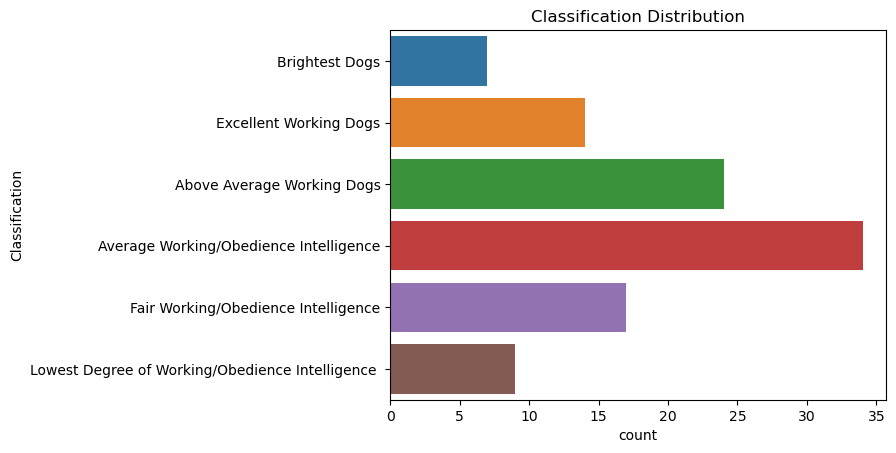

In [67]:

sns.countplot(y=dd.sort_values(by='obey', ascending=False)['Classification'])
plt.title('Classification Distribution')

### .................. JULI .....................

### .................. NADZ .....................

### .................. KEV .....................